In [1]:
import ROOT

In [ ]:
%%bash

rootls -l combined_all_simulated_hist_modified_dedx_newrel_S22-04-08_cerenkov.root


In [2]:
treepath = "generator/isoGen_Tree"
filepath = "extrafiles/combined_all_simulated_hist_modified_dedx_newrel_S22-04-08_cerenkov.root"

In [3]:
df = ROOT.RDataFrame(treepath, filepath)

In [4]:
df.Display().Print()

+-----+-----------+-----------+-----------+-------------+-------------+-------------+----------+-----+
| Row | cosx      | cosy      | cosz      | fx          | fy          | fz          | inSurfID | ... | 
+-----+-----------+-----------+-----------+-------------+-------------+-------------+----------+-----+
| 0   | 0.929443  | -0.078058 | -0.360614 | 765.000000  | -333.689042 | 2989.867269 | 4        | ... | 
+-----+-----------+-----------+-----------+-------------+-------------+-------------+----------+-----+
| 1   | 0.899282  | -0.269532 | 0.344447  | 246.096686  | -762.000000 | 2734.712209 | 4        | ... | 
+-----+-----------+-----------+-----------+-------------+-------------+-------------+----------+-----+
| 2   | 0.406357  | -0.723583 | -0.557945 | -283.672115 | -762.000000 | 509.922044  | 4        | ... | 
+-----+-----------+-----------+-----------+-------------+-------------+-------------+----------+-----+
| 3   | -0.249259 | 0.925936  | 0.283745  | -762.000000 | 625.145791 

Info in <Print>: Only showing 8 columns out of 15



In [5]:
df.GetColumnNames()

vector<string>{ "cosx", "cosy", "cosz", "fx", "fy", "fz", "inSurfID", "it", "ix", "iy", "iz", "localPhi", "localTheta", "outSurfID" }

### Dimensions of Detector

In [7]:
%jsroot on
xi_histo = df.Histo1D(("xi_histo", "Distribution of xi", 50, -1000, 1000), "ix")


c_xi = ROOT.TCanvas()
xi_histo.Draw()
c_xi.Draw()

In [8]:
xf_histo = df.Histo1D(("xf_histo", "Distribution of xf", 50, -1000, 1000), "fx")

c_xf = ROOT.TCanvas()
xf_histo.Draw()
c_xf.Draw()

In [9]:
yi_histo = df.Histo1D(("yi_histo", "Distribution of yi", 50, -1000, 1000), "iy")

c_yi = ROOT.TCanvas()
yi_histo.Draw()
c_yi.Draw()

In [10]:
zi_histo = df.Histo1D(("zi_histo", "Distribution of zi", 50, 0, 6000), "iz")

c_zi = ROOT.TCanvas()
zi_histo.Draw()
c_zi.Draw()

Thus, here from these plots we can figure out the dimensions of the NOvA scintillator detector, \
In X-coordinate : 16 m \
In Y-coordinate : 16 m \
In Z-coordinate : 60 m 

### Distribution of Incoming and Outgoing particles from detector

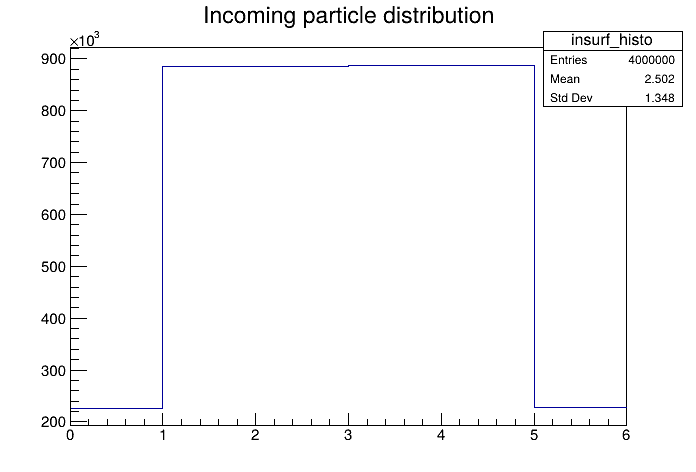

In [6]:
insurf_histo = df.Histo1D(("insurf_histo","Incoming particle distribution", 6, 0, 6), "inSurfID")

c_insurf = ROOT.TCanvas()
insurf_histo.Draw()
c_insurf.Draw()

We know that the detector has a cuboidal shape. Thus it has 6 surfaces.\
 From this histogram, we can see that, there are 6 IDs for each of the generated particles. Out of these 6 bin IDs 0 and 5 have the least number of monopoles generated on. Thus, from this we can infer that the these IDs refer to the XY-plane surfaces (assuming isotropic distribution) since these surfaces have the least area.

In [12]:
outsurf_histo = df.Histo1D(("outsurf_histo","Outgoing particle distribution", 6, 0, 6), "outSurfID")

c_outsurf = ROOT.TCanvas()
outsurf_histo.Draw()
c_outsurf.Draw()

The outgoing particle distribution on the basis of surface is almost same as the incoming particle distribution. This further verifies the isotropic distribution of generated monopoles.\
Also, the total number of entries in both the histograms are exactly equal which implies 100 percent penetration of detector by magnetic monopoles.

### Distribution of magnetic monopoles according to cosx, cosy and cosz variables

In [13]:
cosx_histo = df.Histo1D(("cosx_histo", "Distribution of cosx of generated particles", 50, -1, 1 ), "cosx")

c_cosx = ROOT.TCanvas()
cosx_histo.Draw()
c_cosx.Draw()

In [14]:
cosy_histo = df.Histo1D(("cosy_histo", "Distribution of cosy of generated particles", 50, -1, 1 ), "cosy")

c_cosy = ROOT.TCanvas()
cosy_histo.Draw()
c_cosy.Draw()

In [15]:
cosz_histo = df.Histo1D(("cosz_histo", "Distribution of cosz of generated particles", 50, -1, 1 ), "cosz")

c_cosz = ROOT.TCanvas()
cosz_histo.Draw()
c_cosz.Draw()

In [ ]:
df = df.Define("cosmag2", "TMath::Power(cosx, 2) + TMath::Power(cosy, 2) + TMath::Power(cosz, 2)")
df.GetColumnNames()

In [24]:
model = ROOT.RDF.TH1DModel("trialhisto", "title", 51, 0, 2)
trialhisto = df.Histo1D(model, "cosmag2")
c = ROOT.TCanvas()
trialhisto.Draw()
c.Draw()

This is expected, because cosx, cosy and cosz are direction cosines of the generated monopoles. Hence, the sum of squares must be equal to 1.